# Visualize Ticker Features

This notebook loads and visualizes the features for a single ticker.

,Open,High,Low,Close,Volume,Volume_Prev,Dividends,Stock Splits,RSI,MACD,...,BB_Lower,BB_Middle,BB_Pband,SMA_20,SMA_50,SMA_100,SMA_200,EMA_100,EMA_200,analyst_targets
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,34.587871,35.773124,33.843411,35.753532,1176200,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2020-06-05,37.937921,39.005629,37.399170,38.280766,1478700,1176200.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2020-06-08,38.976230,39.250502,38.300339,39.132957,1403000,1478700.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2020-06-09,37.898738,38.114240,37.075917,37.477531,1150300,1403000.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2020-06-10,37.105310,37.105310,35.273551,35.430279,1699100,1150300.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30,88.570000,89.459999,88.089996,89.290001,1596600,585000.0,0.0,0.0,56.880031,0.520986,...,86.585658,88.236960,0.818852,88.236960,87.439275,86.136998,83.700727,86.116669,83.593339,None
2025-06-02,88.739998,89.699997,88.190002,89.669998,603000,1596600.0,0.0,0.0,58.406002,0.582351,...,86.556250,88.318076,0.883671,88.318076,87.470322,86.211191,83.764922,86.187031,83.653803,None
2025-06-03,89.260002,89.790001,87.949997,89.620003,594026,603000.0,0.0,0.0,58.114603,0.619805,...,86.835956,88.474138,0.849737,88.474138,87.518957,86.279092,83.825876,86.255011,83.713169,None


Sector for L: Financial Services


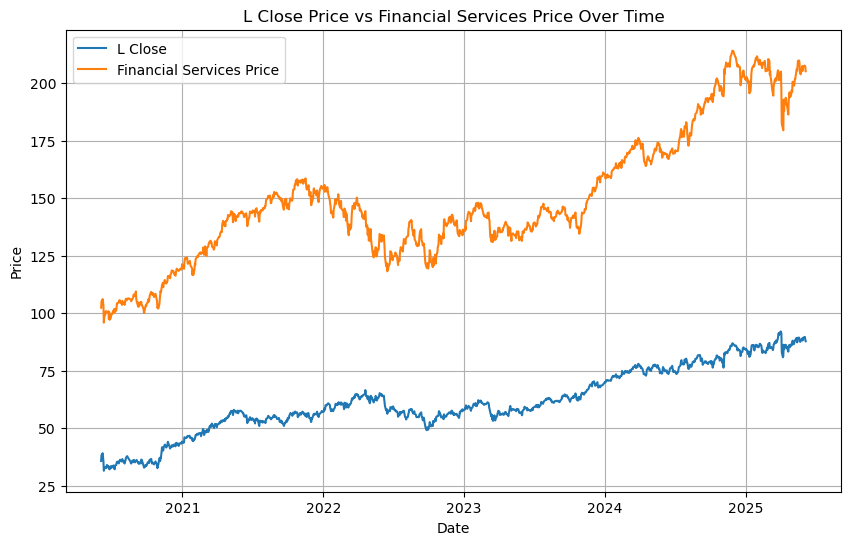

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the ticker's features from the Parquet file
ticker = 'L'  # Change this to the desired ticker
df = pd.read_parquet(f'../data/ticker_features/{ticker}_features.parquet')

# Display the last few rows
display(df)

# Load the sector mapping from JSON
with open('../data/market_features/sector_mapping.json', 'r') as f:
    sector_dict = json.load(f)

# Get the sector for the ticker
sector = sector_dict.get(ticker, 'Unknown')
print(f"Sector for {ticker}: {sector}")

# Load the sector's Parquet file
sector_df = pd.read_parquet(f'../data/market_features/sectors/{sector}.parquet')

# Plot the ticker's 'Close' price over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label=f'{ticker} Close')

# Overlay the sector's 'price' data
plt.plot(sector_df.index, sector_df['price'], label=f'{sector} Price')

plt.title(f'{ticker} Close Price vs {sector} Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()